This model is made for the sntiment analysis

In [120]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [121]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
lemmatizer = WordNetLemmatizer()

In [21]:
df = pd.read_csv("data.csv")

In [22]:
df.columns = ['target','id','date','flag','user','text']

In [23]:
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [24]:
df = df.drop(columns =['id','date','flag','user'])

In [25]:
df['text_len'] = df['text'].apply(lambda x: len(x))

In [26]:
df.head(1)

,target,text,text_len
0,0,is upset that he can't update his Facebook by ...,111


<AxesSubplot:xlabel='text_len', ylabel='Count'>

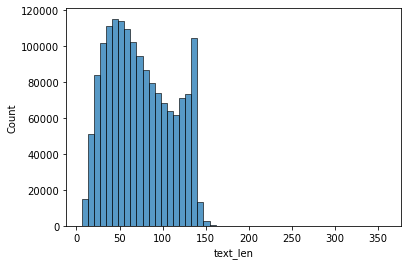

In [35]:
sns.histplot(df['text_len'],bins=50)

In [13]:
train_portion = int((2/3) * len(df))
df_test = df[train_portion:]
df = df[0:train_portion]

In [15]:
print(df_test.shape)
print(df.shape)

(533333, 2)
(1066666, 2)


In [129]:
tokenizer = RegexpTokenizer(r'\w+')

In [136]:
def remove_mention(text):
    text_split = text.split(" ")
    new_text = ""
    for i in text_split:
        #print(i)
        if "@" not in i:
            new_text += i + " "
    #print(new_text)
    return new_text[0:len(new_text)-1]

In [137]:
def tokenize(text):
    text = remove_mention(text)
    words = tokenizer.tokenize(text.lower())
    filtered = []
    for i in words:
        if not i in stopwords.words():
            filtered.append(i)
    for j in range(len(filtered)):
        filtered[j] = lemmatizer.lemmatize(filtered[j])
    return filtered

In [138]:
test_df = df[0:20]

In [139]:
test_df['tokenized_text'] = test_df['text'].apply(tokenize)

<ipython-input-139-944f8d003c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tokenized_text'] = test_df['text'].apply(tokenize)


In [140]:
pd.set_option('display.max_colwidth', None)

In [142]:
#Testing dummy df
test_df.head(10)

,target,text,text_len,tokenized_text
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,"[upset, update, facebook, texting, might, cry, result, school, today, blah]"
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,"[dived, many, time, ball, managed, save, 50, rest, go, bound]"
2,0,my whole body feels itchy and like its on fire,47,"[whole, body, feel, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,"[behaving, mad, see]"
4,0,@Kwesidei not the whole crew,29,"[whole, crew]"
5,0,Need a hug,11,"[need, hug]"
6,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",99,"[hey, long, time, see, yes, rain, bit, bit, lol, fine, thanks]"
7,0,@Tatiana_K nope they didn't have it,36,[nope]
8,0,@twittera que me muera ?,25,[muera]
9,0,spring break in plain city... it's snowing,43,"[spring, break, plain, city, snowing]"


In [154]:
pd.set_option('display.max_colwidth', 80)
word_dict = {}

In [ ]:
df['tokenized_text'] = df['text'].apply(tokenize)

In [ ]:
for word_list in df['tokenized_text']:
    for j in word_list:
        if j in word_dict.keys():
            word_dict[j] += 
        